In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train_set = pd.read_csv("/home/neosoft/Downloads/train.csv")

In [3]:
#Getting first five rows of training data
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


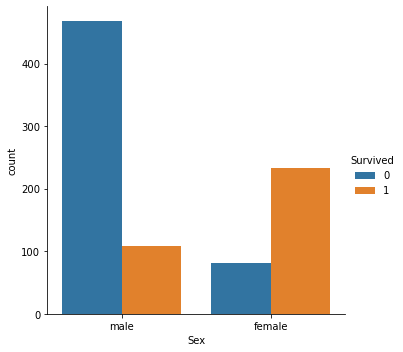

In [7]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = train_set)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

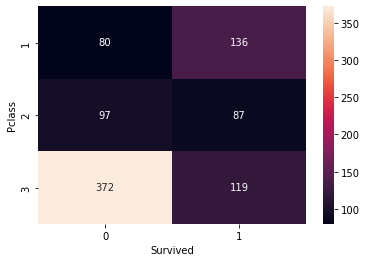

In [8]:
# Group the dataset by Pclass and Survived and then unstack them
group = train_set.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

<AxesSubplot:xlabel='Sex', ylabel='Age'>

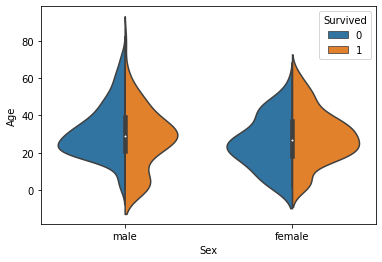

In [9]:
# Violinplot Displays distribution of data across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = train_set, split = True)

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

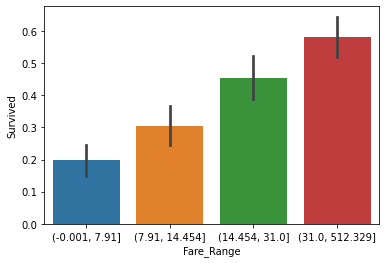

In [10]:
# Divide Fare into 4 bins
train_set['Fare_Range'] = pd.qcut(train_set['Fare'], 4)

# Barplot - Shows approximate values based on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',data = train_set)


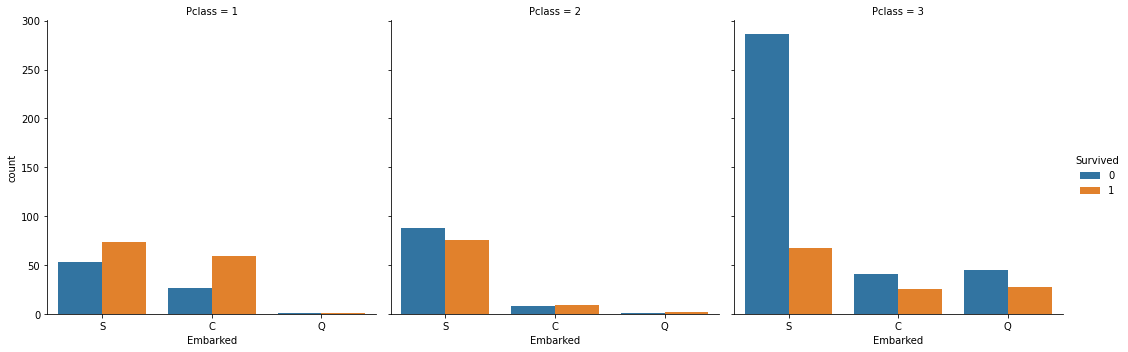

In [11]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = train_set)

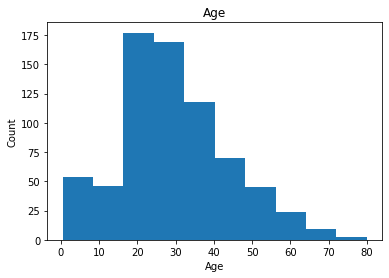

In [12]:
plt.hist(train_set['Age'])
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

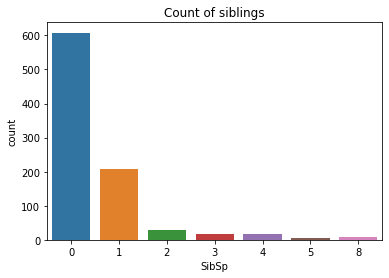

In [13]:
sns.countplot(x = train_set['SibSp'])
plt.title('Count of siblings')
plt.show()

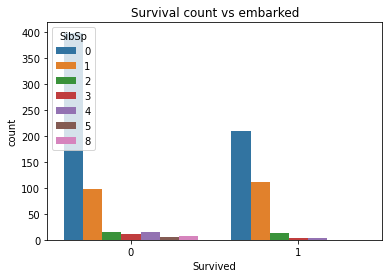

In [14]:
sns.countplot(x=train_set['Survived'],hue=train_set['SibSp'])
plt.title('Survival count vs embarked')
plt.show()

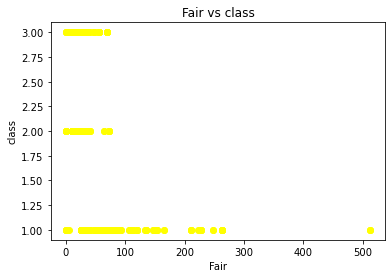

In [15]:
plt.scatter(train_set['Fare'],train_set['Pclass'],color="Yellow")
plt.title('Fair vs class')
plt.xlabel('Fair')
plt.ylabel('class')
plt.show()

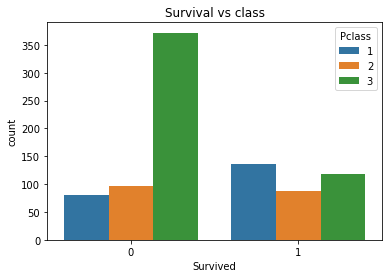

In [16]:
sns.countplot(x=train_set['Survived'],hue=train_set['Pclass'])
plt.title('Survival vs class')
plt.show()

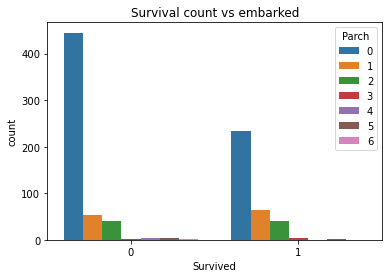

In [17]:
sns.countplot(x=train_set['Survived'],hue=train_set['Parch'])
plt.title('Survival count vs embarked')
plt.show()

In [18]:
train_set['Sex'].replace({'male':1,'female':0},inplace=True)

In [19]:
train_set['Age'].fillna(train_set['Age'].mode()[0],inplace=True)
train_set['Embarked'].fillna(train_set['Embarked'].mode()[0],inplace=True)

In [20]:
train_set['Embarked'].replace({'S':0,'C':1,'Q':2},inplace=True)

In [21]:
train_set.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Range
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,NaN,0,"(7.91, 14.454]"
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B42,0,"(14.454, 31.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.45,NaN,0,"(14.454, 31.0]"
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C148,1,"(14.454, 31.0]"
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,NaN,2,"(-0.001, 7.91]"


In [22]:
train_set.drop(['Name', 'Fare_Range'], axis=1, inplace=True)

In [23]:
train_set.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [24]:
train_set.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,1,27.0,0,0,13.00,0
887,1,1,0,19.0,0,0,30.00,0
888,0,3,0,24.0,1,2,23.45,0
889,1,1,1,26.0,0,0,30.00,1
890,0,3,1,32.0,0,0,7.75,2


In [25]:
x=train_set.iloc[:,1:]

In [26]:
y=train_set.iloc[:,:1]

In [27]:
x.head(5),y.head(5)

(   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0       3    1  22.0      1      0   7.2500         0
 1       1    0  38.0      1      0  71.2833         1
 2       3    0  26.0      0      0   7.9250         0
 3       1    0  35.0      1      0  53.1000         0
 4       3    1  35.0      0      0   8.0500         0,
    Survived
 0         0
 1         1
 2         1
 3         1
 4         0)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

/home/neosoft/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [31]:
pred=logmodel.predict(x_test)

In [32]:
#classification_report=(y_test,pred)
#classification_report

In [33]:
accuracy_score(y_test, pred)

0.7723880597014925